In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv('./weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
df.drop(['Gender'], axis=1, inplace=True)
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [10]:
def lbs_to_kg(weight):
    return weight * 0.453592

def in_to_ft(inches):
    return inches / 12

df['Height'] = df['Height'].apply(in_to_ft)

df['Weight'] = df['Weight'].apply(lbs_to_kg)
df.head()

,Height,Weight
0,6.153918,109.720985
1,5.731825,73.622732
2,6.175842,96.497550
3,5.977582,99.809504
4,5.823483,93.598619


In [11]:
#find nan values
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0, 0.5, 'Height (ft)')

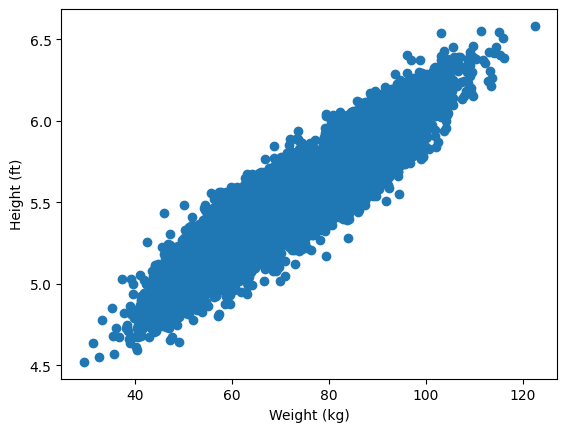

In [12]:
#scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (ft)')

In [13]:
##finding correlation
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


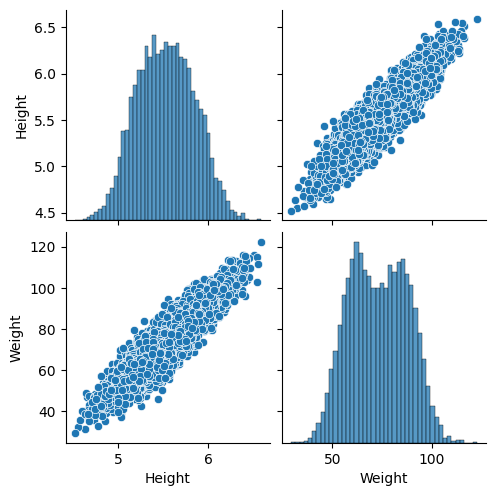

In [14]:
import seaborn as sns
sns.pairplot(df)

In [15]:
X=df[['Weight']]
y=df['Height']

In [17]:
##splitting data
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [18]:
##Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.97013032],
       [-0.99434087],
       [ 0.96639068],
       ...,
       [ 0.03546792],
       [-0.38478892],
       [ 0.31391108]])

In [19]:
X_train = scaler.transform(X_train)

In [20]:
##Apply simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print("slope is: ",model.coef_)
print("intercept is: ",model.intercept_)

slope is:  [0.29580534]
intercept is:  5.531042989875357


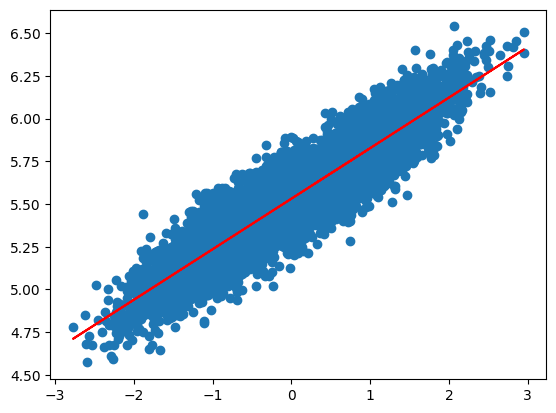

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')

In [25]:
##performance matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
y_pred = model.predict(X_test)

/Users/sankalp/Desktop/Machine Learning bootcamp/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)

Mean Squared Error:  485.8996149603577
Mean Absolute Error:  21.666837693295435
Root Mean Squared Error:  22.04313078853269


In [28]:
##R2 score
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print("R2 score: ",score)

R2 score:  -4671.925103377135


In [29]:
##Ajdusted R2 score
1 - (1- score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-4673.795769951746

In [30]:
##OLS method
import statsmodels.api as sm

In [31]:
OLSModel = sm.OLS(y_train, X_train).fit()

In [32]:
print(OLSModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.44
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                    3.72e-06
Time:                        19:33:08   Log-Likelihood:                         -23472.
No. Observations:                7500   AIC:                                  4.695e+04
Df Residuals:                    7499   BIC:                                  4.695e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
##prediction for new Data
model.predict(scaler.transform([[50]]))

/Users/sankalp/Desktop/Machine Learning bootcamp/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5.0576997])